In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Data Set Information:**

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

**Predicted attribute**: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


**Attribute Information:**

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Iris Setosa, Iris Versicolour, Iris Virginica


In [6]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
iris.head()


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.shape

(150, 5)

In [17]:
iris.columns = ['sepal_length','sepal_width','petal_length', 'petal_width', 'species']
# Petal length greater than sepal length?
iris.query('petal_length > sepal_length')

# Petal length equals sepal length?
iris.query('petal_length == sepal_length')

,sepal_length,sepal_width,petal_length,petal_width,species


In [9]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
pd.isnull(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [11]:
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

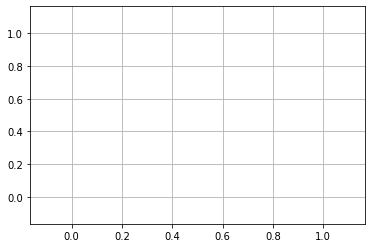

In [18]:
iris_setso = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];
plt.plot(iris_setso["petal_length"],np.zeros_like(iris_setso["petal_length"]), 'o');
plt.plot(iris_versicolor["petal_length"],np.zeros_like(iris_versicolor["petal_length"]), 'o');
plt.plot(iris_virginica["petal_length"],np.zeros_like(iris_virginica["petal_length"]), 'o');
plt.grid();
plt.show();

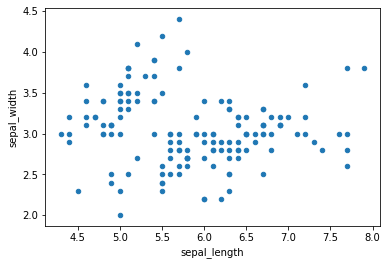

In [0]:
iris.plot(kind="scatter",x="sepal_length",y="sepal_width")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


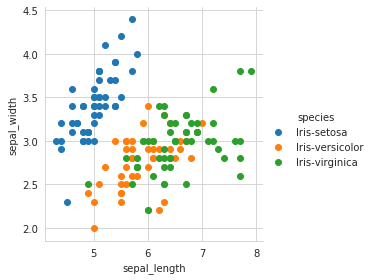

In [0]:
sns.set_style("whitegrid");
sns.FacetGrid(iris,hue="species",size=4) \
    .map(plt.scatter,"sepal_length","sepal_width") \
    .add_legend()
plt.show()

In [0]:
import plotly.express as px
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',color='species')
fig.show()

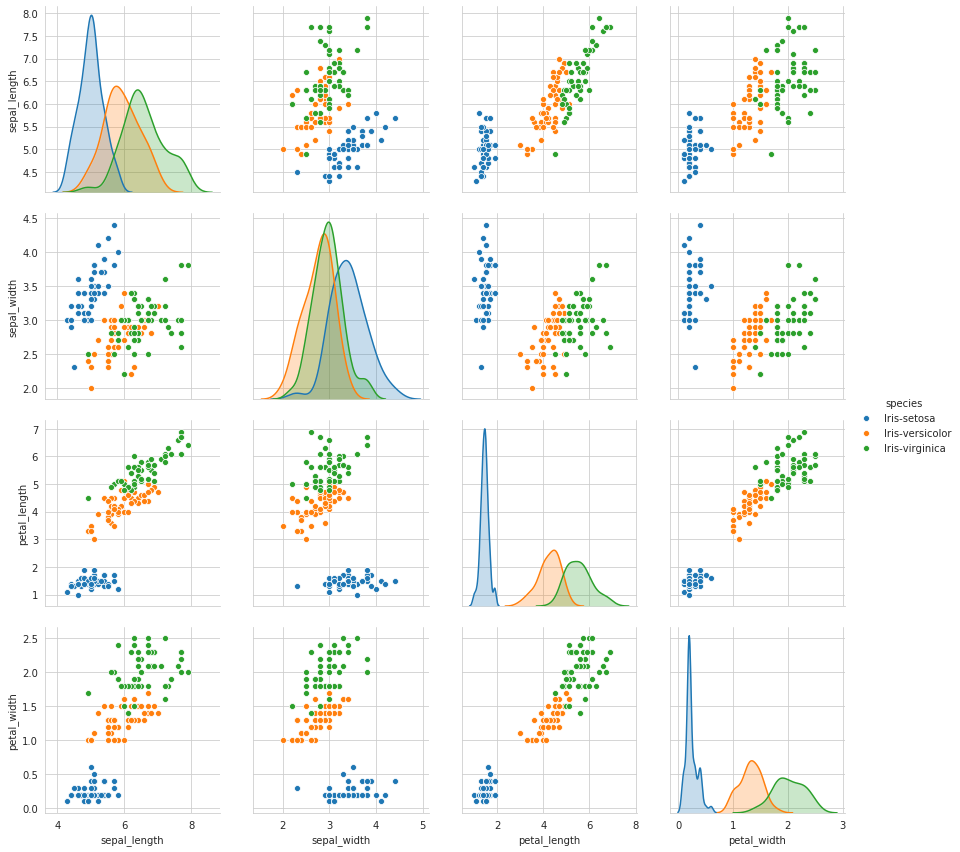

In [0]:
sns.set_style("whitegrid");
sns.pairplot(iris,hue="species",height=3);
plt.show()

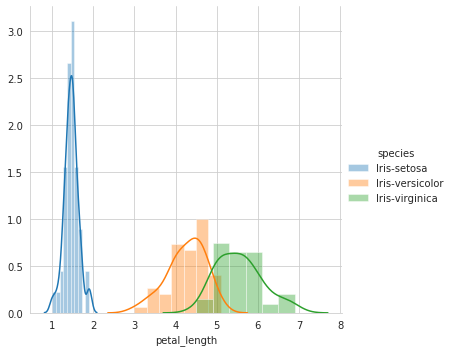

In [0]:
sns.FacetGrid(iris,hue="species",height=5) \
    .map(sns.distplot,"petal_length") \
    .add_legend();
    
plt.show();

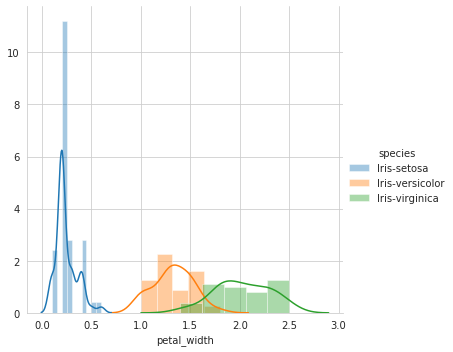

In [0]:
sns.FacetGrid(iris,hue="species",height=5) \
    .map(sns.distplot,"petal_width") \
    .add_legend();
    
plt.show();

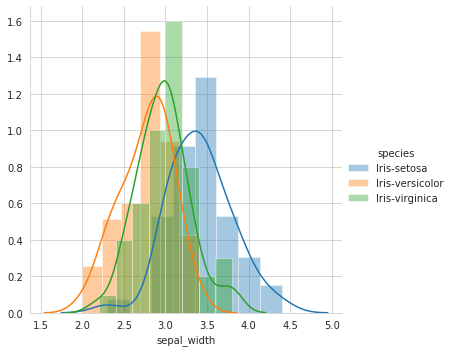

In [0]:
sns.FacetGrid(iris,hue="species",height=5) \
    .map(sns.distplot,"sepal_width") \
    .add_legend();
    
plt.show();

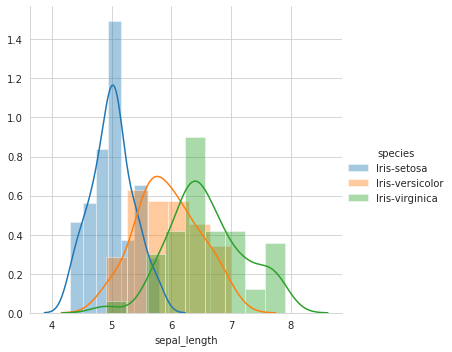

In [0]:
sns.FacetGrid(iris,hue="species",height=5) \
    .map(sns.distplot,"sepal_length") \
    .add_legend();
    
plt.show();

In [0]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
iris.columns = ['sepal_length','sepal_width','petal_length', 'petal_width', 'species']


In [0]:
iris_setosa = iris.loc[iris["species"] == "Iris-setosa"];
iris_virginica = iris.loc[iris["species"] == "Iris-virginica"];
iris_versicolor = iris.loc[iris["species"] == "Iris-versicolor"];
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density = True)


In [0]:
np.histogram(iris_setosa['petal_length'], bins=10, density = True)

(array([0.22222222, 0.22222222, 0.44444444, 1.55555556, 2.66666667,
        3.11111111, 1.55555556, 0.88888889, 0.        , 0.44444444]),
 array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]))

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


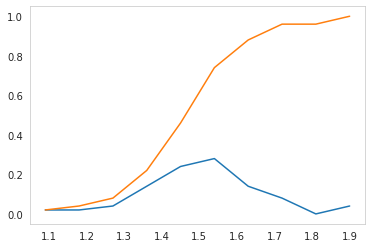

In [0]:
pdf = counts/(sum(counts))
print(pdf); 

print(bin_edges);

cdf = np.cumsum(pdf)
plt.grid()
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

In [0]:
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))
print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))


Means:
1.464
2.4156862745098038
5.552
4.26

Std-dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204


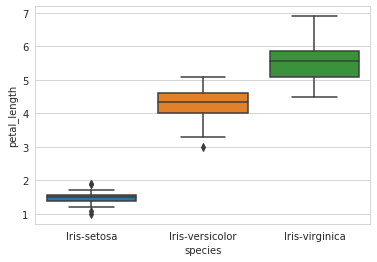

In [0]:
sns.boxplot(x="species",y="petal_length", data=iris)
plt.show()

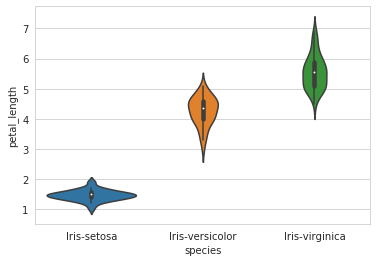

In [0]:
sns.violinplot(x='species',y='petal_length', data=iris, size=8)
plt.show()